Project One, Phase Two, Question Three

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

0 : Decrease

1 : Increase

Getting our main data:

In [2]:
xmr = yf.Ticker('XMR-USD')
df_xmr = pd.DataFrame(yf.download(tickers = "XMR-USD", period = "max", interval = "1d"))
df_xmr.rename(columns={'Open':'Open_XMR', 'High':'High_XMR', 'Low':'Low_XMR', 'Close':'Close_XMR', 'Adj Close':'Adj Close_XMR', 'Volume':'Volume_XMR'}, inplace = True)
df_xmr['Tomorrow_XMR'] = df_xmr['Close_XMR'].shift(-1)
df_xmr['Target_XMR'] = (df_xmr['Tomorrow_XMR'] > df_xmr['Close_XMR']).astype(int)
df_xmr.drop(columns=['Tomorrow_XMR'], inplace = True)
df_xmr['Month_XMR'] = df_xmr.index.month
df_xmr['Weekday_XMR'] = df_xmr.index.weekday
df_xmr

[*********************100%%**********************]  1 of 1 completed


,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR
Date,,,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0,11,3
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1,11,4
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1,11,5
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0,11,6
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0,11,0
...,...,...,...,...,...,...,...,...,...
2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0,10,4
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0,10,5
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1,10,6


Adding some features to enrich our data using 2, 7, 15 day intervals:

In [3]:
horizons = [2, 7, 15]

for horizon in horizons:

    rolling_averages = df_xmr.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_XMR_{horizon}'
    df_xmr[ratio_column] = df_xmr['Close_XMR'] / rolling_averages['Close_XMR']

    trend_column = f'Trend_XMR_{horizon}'
    df_xmr[trend_column] = df_xmr.shift(1).rolling(horizon).sum()['Target_XMR']

df_xmr = df_xmr[15:]

Using the same thing to extract other data:

In [4]:
btc = yf.Ticker('BTC-USD')
df_btc = pd.DataFrame(yf.download(tickers = "BTC-USD", period = "max", interval = "1d"))
df_btc.rename(columns={'Open':'Open_BTC', 'High':'High_BTC', 'Low':'Low_BTC', 'Close':'Close_BTC', 'Adj Close':'Adj Close_BTC', 'Volume':'Volume_BTC'}, inplace = True)
df_btc['Tomorrow_BTC'] = df_btc['Close_BTC'].shift(-1)
df_btc['Target_BTC'] = (df_btc['Tomorrow_BTC'] > df_btc['Close_BTC']).astype(int)
df_btc.drop(columns=['Tomorrow_BTC'], inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [5]:
horizons = [2, 7, 15]

for horizon in horizons:

    rolling_averages = df_btc.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_BTC_{horizon}'
    df_btc[ratio_column] = df_btc['Close_BTC'] / rolling_averages['Close_BTC']

    trend_column = f'Trend_BTC_{horizon}'
    df_btc[trend_column] = df_btc.shift(1).rolling(horizon).sum()['Target_BTC']

df_btc['Target_BTC'] = df_btc['Target_BTC'].shift(2)

df_btc = df_btc[15:]

In [6]:
eth = yf.Ticker('ETH-USD')
df_eth = pd.DataFrame(yf.download(tickers = "ETH-USD", period = "max", interval = "1d"))
df_eth.rename(columns={'Open':'Open_ETH', 'High':'High_ETH', 'Low':'Low_ETH', 'Close':'Close_ETH', 'Adj Close':'Adj Close_ETH', 'Volume':'Volume_ETH'}, inplace = True)
df_eth['Tomorrow_ETH'] = df_eth['Close_ETH'].shift(-1)
df_eth['Target_ETH'] = (df_eth['Tomorrow_ETH'] > df_eth['Close_ETH']).astype(int)
df_eth.drop(columns=['Tomorrow_ETH'], inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [7]:
horizons = [2, 7, 15]

for horizon in horizons:

    rolling_averages = df_eth.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_ETH_{horizon}'
    df_eth[ratio_column] = df_eth['Close_ETH'] / rolling_averages['Close_ETH']

    trend_column = f'Trend_ETH_{horizon}'
    df_eth[trend_column] = df_eth.shift(1).rolling(horizon).sum()['Target_ETH']

df_eth['Target_ETH'] = df_eth['Target_ETH'].shift(2)

df_eth = df_eth[15:]

In [8]:
gold = yf.Ticker('GC=F')
df_gold = pd.DataFrame(yf.download(tickers = "GC=F", period = "max", interval = "1d"))
df_gold.rename(columns={'Open':'Open_G', 'High':'High_G', 'Low':'Low_G', 'Close':'Close_G', 'Adj Close':'Adj Close_G', 'Volume':'Volume_G'}, inplace = True)
df_gold['Tomorrow_G'] = df_gold['Close_G'].shift(-1)
df_gold['Target_G'] = (df_gold['Tomorrow_G'] > df_gold['Close_G']).astype(int)
df_gold.drop(columns=['Tomorrow_G'], inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [9]:
horizons = [2, 7, 15]

for horizon in horizons:

    rolling_averages = df_gold.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_G_{horizon}'
    df_gold[ratio_column] = df_gold['Close_G'] / rolling_averages['Close_G']

    trend_column = f'Trend_G_{horizon}'
    df_gold[trend_column] = df_gold.shift(1).rolling(horizon).sum()['Target_G']

df_gold['Target_G'] = df_gold['Target_G'].shift(2)

df_gold = df_gold[15:]

In [10]:
dollar = yf.Ticker('DX=F')
df_dollar = pd.DataFrame(yf.download(tickers = "DX=F", period = "max", interval = "1d"))
df_dollar.rename(columns={'Open':'Open_D', 'High':'High_D', 'Low':'Low_D', 'Close':'Close_D', 'Adj Close':'Adj Close_D', 'Volume':'Volume_D'}, inplace = True)
df_dollar['Tomorrow_D'] = df_dollar['Close_D'].shift(-1)
df_dollar['Target_D'] = (df_dollar['Tomorrow_D'] > df_dollar['Close_D']).astype(int)
df_dollar.drop(columns=['Tomorrow_D'], inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [11]:
horizons = [2, 7, 15]

for horizon in horizons:

    rolling_averages = df_dollar.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_D_{horizon}'
    df_dollar[ratio_column] = df_dollar['Close_D'] / rolling_averages['Close_D']

    trend_column = f'Trend_D_{horizon}'
    df_dollar[trend_column] = df_dollar.shift(1).rolling(horizon).sum()['Target_D']

df_dollar['Target_D'] = df_dollar['Target_D'].shift(2)

df_dollar = df_dollar[15:]

In [12]:
spy = yf.Ticker('SPY')
df_spy = pd.DataFrame(yf.download(tickers = "SPY", period = "max", interval = "1d"))
df_spy.rename(columns={'Open':'Open_S', 'High':'High_S', 'Low':'Low_S', 'Close':'Close_S', 'Adj Close':'Adj Close_S', 'Volume':'Volume_S'}, inplace = True)
df_spy['Tomorrow_S'] = df_spy['Close_S'].shift(-1)
df_spy['Target_S'] = (df_spy['Tomorrow_S'] > df_spy['Close_S']).astype(int)
df_spy.drop(columns=['Tomorrow_S'], inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [13]:
horizons = [2, 5, 7, 10, 15]

for horizon in horizons:

    rolling_averages = df_spy.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_S_{horizon}'
    df_spy[ratio_column] = df_spy['Close_S'] / rolling_averages['Close_S']

    trend_column = f'Trend_S_{horizon}'
    df_spy[trend_column] = df_spy.shift(1).rolling(horizon).sum()['Target_S']

df_spy['Target_S'] = df_spy['Target_S'].shift(2)

df_spy = df_spy[15:]

Using the given data for more complexity:

In [14]:
hash = pd.read_csv(r'C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project2\Data\XMR_hash.csv')
hash['time'] = pd.to_datetime(hash['time'])
hash['date'] = hash['time'].dt.date
new_hash = hash.groupby('date')['hash'].mean().reset_index()
new_hash.rename(columns={'date':'Date'}, inplace = True)
new_hash['Date'] = pd.to_datetime(new_hash['Date'])

In [15]:
difficulty = pd.read_csv(r'C:\Users\ROG\Desktop\Worklife\Data\MLBootcamp\Project2\Data\XMR_difficulty.csv')
difficulty['time'] = pd.to_datetime(difficulty['time'])
difficulty['date'] = difficulty['time'].dt.date
new_diff = difficulty.groupby('date')['difficulty'].mean().reset_index()
new_diff.rename(columns={'date':'Date'}, inplace = True)
new_diff['Date'] = pd.to_datetime(new_diff['Date'])

Merging all the data:

In [16]:
df = df_xmr.merge(df_btc, on = 'Date', how = 'left')
df = df.merge(df_eth, on = 'Date', how = 'left')
df = df.merge(df_gold, on = 'Date', how = 'left')
df = df.merge(df_dollar, on = 'Date', how = 'left')
df = df.merge(df_spy, on = 'Date', how = 'left')
df = df.merge(new_hash, on = 'Date', how = 'left')
df = df.merge(new_diff, on = 'Date', how = 'left')
df = df.loc[:2143]
df

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
0,2017-11-24,158.619003,162.942001,156.761002,160.026993,160.026993,69178000,1,11,4,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.757089e+08,3.308507e+10
1,2017-11-25,159.994995,170.104004,159.994995,168.442001,168.442001,64076700,0,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.697100e+08,3.236520e+10
2,2017-11-26,168.572006,168.720001,159.763000,163.373993,163.373993,61100400,1,11,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.881852e+08,3.458222e+10
3,2017-11-27,162.916000,173.391998,159.947998,173.391998,173.391998,81489696,1,11,0,...,1.001933,3.0,1.003576,4.0,1.005673,5.0,1.005912,7.0,2.679894e+08,3.215872e+10
4,2017-11-28,175.348007,203.210007,173.173004,203.210007,203.210007,179179008,0,11,1,...,1.008548,3.0,1.011389,4.0,1.014096,5.0,1.015065,7.0,2.854715e+08,3.425658e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2023-10-03,146.193024,147.805603,145.165909,147.151352,147.151352,49389643,1,10,1,...,0.989207,2.0,0.987310,3.0,0.982840,3.0,0.970498,6.0,2.786988e+09,3.344386e+11
2140,2023-10-04,147.168442,150.702347,145.940781,150.469055,150.469055,59400400,0,10,2,...,0.997060,2.0,0.997025,3.0,0.993234,4.0,0.980854,6.0,2.852512e+09,3.423015e+11
2141,2023-10-05,150.474197,151.328369,148.565491,149.623718,149.623718,55704972,1,10,3,...,0.998570,1.0,0.997111,3.0,0.994462,4.0,0.984404,5.0,2.782118e+09,3.338542e+11
2142,2023-10-06,149.623337,152.669296,148.641647,151.992264,151.992264,49535004,1,10,4,...,1.009447,2.0,1.007769,3.0,1.006476,5.0,0.998226,6.0,2.984052e+09,3.580862e+11


Copying and Filling weekends data:

In [17]:
cf = df.copy()
cf = cf.ffill(axis=0)
cf.head(25)

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
0,2017-11-24,158.619003,162.942001,156.761002,160.026993,160.026993,69178000,1,11,4,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,275708882.4,3.308507e+10
1,2017-11-25,159.994995,170.104004,159.994995,168.442001,168.442001,64076700,0,11,5,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,269710040.2,3.236520e+10
2,2017-11-26,168.572006,168.720001,159.763000,163.373993,163.373993,61100400,1,11,6,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,288185191.2,3.458222e+10
3,2017-11-27,162.916000,173.391998,159.947998,173.391998,173.391998,81489696,1,11,0,...,1.001933,3.0,1.003576,4.0,1.005673,5.0,1.005912,7.0,267989360.8,3.215872e+10
4,2017-11-28,175.348007,203.210007,173.173004,203.210007,203.210007,179179008,0,11,1,...,1.008548,3.0,1.011389,4.0,1.014096,5.0,1.015065,7.0,285471476.4,3.425658e+10
5,2017-11-29,203.912994,214.274994,165.330994,168.149994,168.149994,178828000,1,11,2,...,1.005835,2.0,1.008086,4.0,1.011536,5.0,1.013393,7.0,292821732.0,3.513861e+10
6,2017-11-30,170.485992,195.393997,156.531006,180.138000,180.138000,128112000,1,11,3,...,1.010578,3.0,1.013185,4.0,1.017036,6.0,1.020717,7.0,292821732.0,3.513861e+10
7,2017-12-01,179.722000,191.848999,169.763000,190.938004,190.938004,70430496,1,12,4,...,1.005337,2.0,1.008619,3.0,1.012655,5.0,1.016956,7.0,292821732.0,3.513861e+10
8,2017-12-02,190.834000,205.264008,186.684006,203.033997,203.033997,80791104,0,12,5,...,1.005337,2.0,1.008619,3.0,1.012655,5.0,1.016956,7.0,288223951.2,3.458687e+10
9,2017-12-03,203.365005,209.085999,191.248001,200.050995,200.050995,111303000,1,12,6,...,1.005337,2.0,1.008619,3.0,1.012655,5.0,1.016956,7.0,299528006.1,3.594336e+10


Splitting Train, test:

In [18]:
train = cf[:-30]
train

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
0,2017-11-24,158.619003,162.942001,156.761002,160.026993,160.026993,69178000,1,11,4,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.757089e+08,3.308507e+10
1,2017-11-25,159.994995,170.104004,159.994995,168.442001,168.442001,64076700,0,11,5,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.697100e+08,3.236520e+10
2,2017-11-26,168.572006,168.720001,159.763000,163.373993,163.373993,61100400,1,11,6,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.881852e+08,3.458222e+10
3,2017-11-27,162.916000,173.391998,159.947998,173.391998,173.391998,81489696,1,11,0,...,1.001933,3.0,1.003576,4.0,1.005673,5.0,1.005912,7.0,2.679894e+08,3.215872e+10
4,2017-11-28,175.348007,203.210007,173.173004,203.210007,203.210007,179179008,0,11,1,...,1.008548,3.0,1.011389,4.0,1.014096,5.0,1.015065,7.0,2.854715e+08,3.425658e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2023-09-03,140.088516,141.391968,139.297470,140.839981,140.839981,49564266,1,9,6,...,1.005115,4.0,1.011854,5.0,1.015770,7.0,1.018445,9.0,2.164826e+09,2.597791e+11
2110,2023-09-04,140.842804,143.770203,140.776291,141.170868,141.170868,63835398,0,9,0,...,1.005115,4.0,1.011854,5.0,1.015770,7.0,1.018445,9.0,2.323926e+09,2.788711e+11
2111,2023-09-05,141.176682,141.299179,137.673279,137.781372,137.781372,54468002,1,9,1,...,0.997890,3.0,1.003510,5.0,1.009131,6.0,1.013871,8.0,2.157782e+09,2.589339e+11
2112,2023-09-06,137.780243,142.644989,137.635544,142.113235,142.113235,67734044,1,9,2,...,0.992478,2.0,0.994780,4.0,1.000534,6.0,1.006551,8.0,2.158740e+09,2.590488e+11


In [19]:
testf = cf[-30:]
testf

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
2114,2023-09-08,143.257370,144.124344,140.928955,143.886154,143.886154,46927009,0,9,4,...,0.995789,2.0,0.993710,3.0,0.996629,6.0,1.002794,9.0,2.058199e+09,2.455810e+11
2115,2023-09-09,143.895950,144.001816,142.324234,143.406815,143.406815,35896666,0,9,5,...,0.995789,2.0,0.993710,3.0,0.996629,6.0,1.002794,9.0,2.112199e+09,2.534639e+11
2116,2023-09-10,143.409027,143.792282,141.827194,142.894440,142.894440,33705148,0,9,6,...,0.995789,2.0,0.993710,3.0,0.996629,6.0,1.002794,9.0,2.181833e+09,2.618200e+11
2117,2023-09-11,142.890076,143.619995,138.178223,139.930466,139.930466,58031716,1,9,0,...,1.003567,2.0,1.001062,3.0,1.001284,6.0,1.007582,9.0,2.194107e+09,2.632929e+11
2118,2023-09-12,139.932358,142.853256,139.286240,140.804672,140.804672,57433672,1,9,1,...,0.999516,2.0,0.996957,3.0,0.995074,5.0,1.001058,8.0,2.180890e+09,2.617068e+11
2119,2023-09-13,140.806717,144.639084,140.553345,143.115967,143.115967,54374646,1,9,2,...,1.000551,3.0,0.999613,3.0,0.996823,5.0,1.000973,9.0,2.189008e+09,2.626810e+11
2120,2023-09-14,143.118500,147.058807,142.308243,146.329483,146.329483,44084896,1,9,3,...,1.006692,4.0,1.007871,4.0,1.005564,5.0,1.008499,9.0,2.214410e+09,2.657292e+11
2121,2023-09-15,146.358139,149.150711,146.358139,147.350723,147.350723,57280169,0,9,4,...,0.992021,3.0,0.993133,4.0,0.991502,5.0,0.991887,9.0,2.140589e+09,2.568707e+11
2122,2023-09-16,147.357681,148.031113,144.276459,144.624649,144.624649,34872985,1,9,5,...,0.992021,3.0,0.993133,4.0,0.991502,5.0,0.991887,9.0,2.221315e+09,2.665578e+11
2123,2023-09-17,144.599152,146.145874,143.445023,145.797852,145.797852,31255846,0,9,6,...,0.992021,3.0,0.993133,4.0,0.991502,5.0,0.991887,9.0,2.071988e+09,2.486385e+11


In [20]:
teste = train[-50:]
teste

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
2064,2023-07-20,165.839523,170.032730,163.327332,165.804794,165.804794,103073885,0,7,3,...,0.999651,3.0,1.002531,5.0,1.009795,7.0,1.014477,10.0,3.024653e+09,3.629584e+11
2065,2023-07-21,165.799377,166.153946,160.945709,162.035080,162.035080,108451552,1,7,4,...,0.998371,3.0,1.000578,4.0,1.006730,7.0,1.012346,9.0,3.250848e+09,3.901018e+11
2066,2023-07-22,162.046997,163.739365,161.369110,162.182755,162.182755,94156998,1,7,5,...,0.998371,3.0,1.000578,4.0,1.006730,7.0,1.012346,9.0,3.280573e+09,3.936688e+11
2067,2023-07-23,162.207565,166.259201,161.578873,163.701218,163.701218,97150671,0,7,6,...,0.998371,3.0,1.000578,4.0,1.006730,7.0,1.012346,9.0,3.227542e+09,3.873051e+11
2068,2023-07-24,163.712601,164.550171,160.260193,160.863770,160.863770,107304657,1,7,0,...,1.001345,3.0,1.003576,4.0,1.007965,7.0,1.015214,9.0,3.329503e+09,3.995404e+11
2069,2023-07-25,160.872971,163.066238,160.055115,162.752228,162.752228,82517267,1,7,1,...,1.003525,3.0,1.004363,5.0,1.007814,7.0,1.016222,9.0,2.805367e+09,3.366440e+11
2070,2023-07-26,162.755463,163.519714,161.314240,163.005035,163.005035,94831356,0,7,2,...,1.003543,3.0,1.003042,5.0,1.005856,7.0,1.014509,10.0,2.532929e+09,3.039514e+11
2071,2023-07-27,163.007690,164.077484,161.404099,162.147064,162.147064,106574136,1,7,3,...,0.996753,3.0,0.996925,4.0,0.998541,6.0,1.005867,10.0,2.462508e+09,2.955009e+11
2072,2023-07-28,162.153610,164.450073,161.934448,163.307877,163.307877,108313267,0,7,4,...,1.004414,4.0,1.006140,4.0,1.006620,7.0,1.012957,11.0,2.732845e+09,3.279414e+11
2073,2023-07-29,163.267380,164.148804,162.194839,163.204437,163.204437,73361895,0,7,5,...,1.004414,4.0,1.006140,4.0,1.006620,7.0,1.012957,11.0,2.450467e+09,2.940560e+11


In [21]:
train = train[:-50]
train

,Date,Open_XMR,High_XMR,Low_XMR,Close_XMR,Adj Close_XMR,Volume_XMR,Target_XMR,Month_XMR,Weekday_XMR,...,Close_Ratio_S_5,Trend_S_5,Close_Ratio_S_7,Trend_S_7,Close_Ratio_S_10,Trend_S_10,Close_Ratio_S_15,Trend_S_15,hash,difficulty
0,2017-11-24,158.619003,162.942001,156.761002,160.026993,160.026993,69178000,1,11,4,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.757089e+08,3.308507e+10
1,2017-11-25,159.994995,170.104004,159.994995,168.442001,168.442001,64076700,0,11,5,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.697100e+08,3.236520e+10
2,2017-11-26,168.572006,168.720001,159.763000,163.373993,163.373993,61100400,1,11,6,...,1.004266,3.0,1.006178,4.0,1.007008,5.0,1.006876,8.0,2.881852e+08,3.458222e+10
3,2017-11-27,162.916000,173.391998,159.947998,173.391998,173.391998,81489696,1,11,0,...,1.001933,3.0,1.003576,4.0,1.005673,5.0,1.005912,7.0,2.679894e+08,3.215872e+10
4,2017-11-28,175.348007,203.210007,173.173004,203.210007,203.210007,179179008,0,11,1,...,1.008548,3.0,1.011389,4.0,1.014096,5.0,1.015065,7.0,2.854715e+08,3.425658e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2023-07-15,160.522354,166.163116,158.885101,164.746613,164.746613,59269011,1,7,5,...,1.008720,4.0,1.012808,4.0,1.012944,6.0,1.019437,9.0,2.711062e+09,3.253274e+11
2060,2023-07-16,164.738251,166.155991,163.240128,165.420975,165.420975,52878375,1,7,6,...,1.008720,4.0,1.012808,4.0,1.012944,6.0,1.019437,9.0,3.053252e+09,3.663902e+11
2061,2023-07-17,165.429062,168.878174,163.579544,168.215012,168.215012,67699721,0,7,0,...,1.007167,4.0,1.012678,5.0,1.014731,6.0,1.020255,10.0,3.059859e+09,3.671831e+11
2062,2023-07-18,168.193787,168.663879,164.411163,166.943405,166.943405,83139882,0,7,1,...,1.009360,4.0,1.015109,6.0,1.019884,6.0,1.024321,11.0,3.124390e+09,3.749268e+11


In [22]:
train.drop(columns = ['Date'], inplace = True)
teste.drop(columns = ['Date'], inplace = True)
testf.drop(columns = ['Date'], inplace = True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_4212\1936590666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = ['Date'], inplace = True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_4212\1936590666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste.drop(columns = ['Date'], inplace = True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_4212\1936590666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testf.drop(colu

Splitting X, y:

In [23]:
Xtrain = train.drop(columns=['Target_XMR'])
ytrain = train['Target_XMR']

In [24]:
Xeval = teste.drop(columns=['Target_XMR'])
yeval = teste['Target_XMR']

In [25]:
Xtest = testf.drop(columns=['Target_XMR'])
ytest = testf['Target_XMR']

Checking for imbalancement:

In [26]:
ytrain.value_counts()

Target_XMR
1    1079
0     985
Name: count, dtype: int64

Using PCA to decomposite the data and reduce dimensionality:

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
Xeval = pca.transform(Xeval)

Using StandardScaler to Standardize data:

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [29]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [30]:
Xeval = scaler.transform(Xeval)
Xeval

array([[ 1.37242376, -1.38288018,  0.38783964],
       [ 1.59189535, -1.73956455,  0.64068203],
       [ 1.61915967, -1.91764828,  0.48305457],
       [ 1.56789049, -1.81628512,  0.51515206],
       [ 1.67243065, -1.52957615,  0.7323378 ],
       [ 1.15298355, -1.55153438,  0.55381675],
       [ 0.88736104, -1.21650921,  0.45550684],
       [ 0.81596823, -1.34464138,  0.48058741],
       [ 1.0820414 , -1.47556796,  0.68776533],
       [ 0.80101066, -1.58570192,  0.4415852 ],
       [ 0.71207102, -1.39763713,  0.32238085],
       [ 0.69241713, -1.23350991,  0.50560293],
       [ 0.70291467, -0.84429172,  0.47096788],
       [ 0.77170265, -0.86184585,  0.80072662],
       [ 0.84088599, -1.25072218,  0.58471226],
       [ 0.97755435, -1.35629988,  0.52784449],
       [ 0.94122328, -1.64640613,  0.41989829],
       [ 0.95318107, -1.61792455,  0.46390661],
       [ 1.05450709, -1.29839665,  0.50160022],
       [ 1.12227697, -1.14272456,  0.87443646],
       [ 1.09047408, -1.08514366,  0.926

Let's train some models:

Using Random Forest:

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=2000, min_samples_split=20, random_state=1, bootstrap=True, oob_score=True, max_samples=1000)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xeval)
ypred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

In [32]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix

<Axes: >

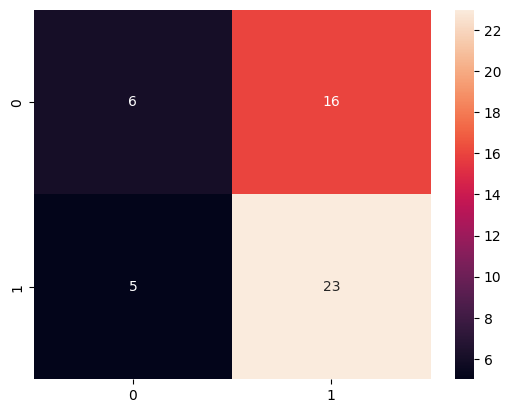

In [33]:
sns.heatmap(confusion_matrix(yeval, ypred), annot=True)

In [34]:
precision_score(yeval, ypred)

0.5897435897435898

In [35]:
recall_score(yeval, ypred)

0.8214285714285714

In [36]:
accuracy_score(yeval, ypred)

0.58

In [37]:
roc_auc_score(yeval, ypred)

0.547077922077922

In [38]:
f1_score(yeval, ypred)

0.6865671641791046

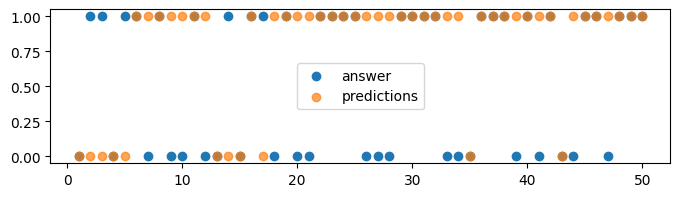

In [39]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xeval.shape[0]+1), yeval, label = 'answer')

plt.scatter(range(1, Xeval.shape[0]+1), ypred, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

Using KNN:

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)

model1.fit(Xtrain, ytrain)
ypred = model1.predict(Xeval)
ypred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1])

<Axes: >

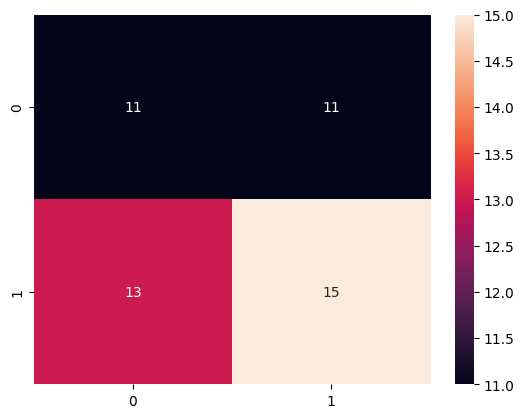

In [41]:
sns.heatmap(confusion_matrix(yeval, ypred), annot=True)

In [42]:
precision_score(yeval, ypred)

0.5769230769230769

In [43]:
recall_score(yeval, ypred)

0.5357142857142857

In [44]:
accuracy_score(yeval, ypred)

0.52

In [45]:
roc_auc_score(yeval, ypred)

0.5178571428571428

In [46]:
f1_score(yeval, ypred)

0.5555555555555555

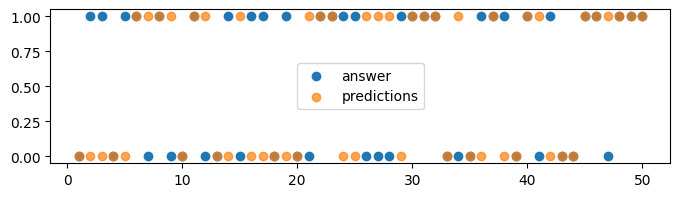

In [47]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xeval.shape[0]+1), yeval, label = 'answer')

plt.scatter(range(1, Xeval.shape[0]+1), ypred, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

Based on what we've seen, we will use the randomforestclassifier as our main:

In [48]:
ypreds = model.predict(Xtest)

<Axes: >

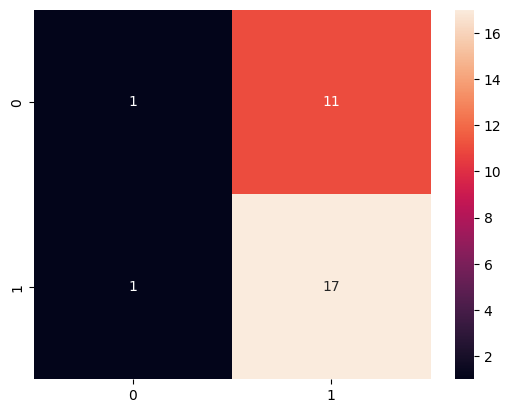

In [49]:
sns.heatmap(confusion_matrix(ytest, ypreds), annot=True)

In [50]:
precision_score(ytest, ypreds)

0.6071428571428571

In [51]:
recall_score(ytest, ypreds)

0.9444444444444444

In [52]:
accuracy_score(ytest, ypreds)

0.6

In [53]:
roc_auc_score(ytest, ypreds)

0.513888888888889

In [54]:
f1_score(ytest, ypreds)

0.7391304347826088

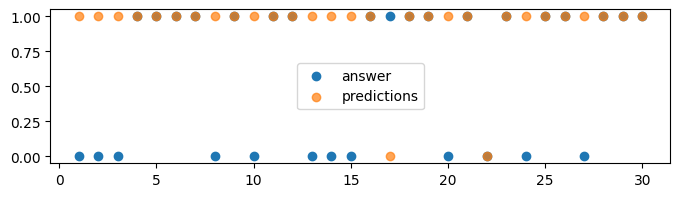

In [55]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xtest.shape[0]+1), ytest, label = 'answer')

plt.scatter(range(1, Xtest.shape[0]+1), ypreds, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

The model's F1 score has increased according to our eval data, the resaon is that our two sets are located in different trend intervals and therefore have different distribution of 0s and 1s.

Let's implement a backtesting system to build more confidence in the model:

In [56]:
pf = cf.copy()

In [57]:
pf.drop(columns=['Date'], inplace = True)

In [58]:
def backtest(data, start = 2114, step = 1):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        pca = PCA(n_components=3)
        Xtrain = train.drop(columns=['Target_XMR'])
        Xtrain = pca.fit_transform(Xtrain)
        ytrains = train['Target_XMR'] 
        Xtest = test.drop(columns=['Target_XMR'])
        Xtest = pca.transform(Xtest)
        scaler = StandardScaler()
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        models = RandomForestClassifier(n_estimators=2000, min_samples_split=20, random_state=1, bootstrap=True, oob_score=True, max_samples=1000)
        models.fit(Xtrain, ytrains)
        predictions = models.predict(Xtest)
        all_predictions.append(predictions)
    return all_predictions

In [59]:
preds = backtest(pf)
y = np.array(preds).flatten()

In [60]:
yhat = ytest

<Axes: >

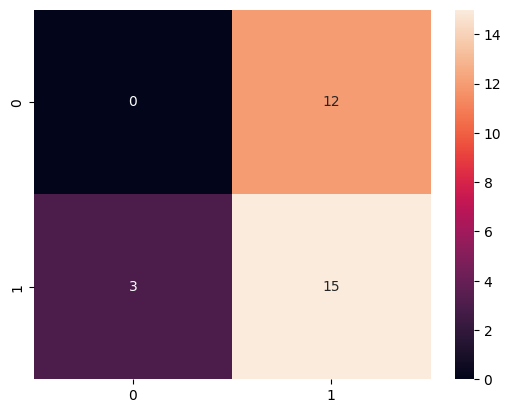

In [61]:
sns.heatmap(confusion_matrix(yhat, y), annot=True)

In [62]:
precision_score(yhat, y)

0.5555555555555556

In [63]:
recall_score(yhat, y)

0.8333333333333334

In [64]:
accuracy_score(yhat, y)

0.5

In [65]:
roc_auc_score(yhat, y)

0.4166666666666667

In [66]:
f1_score(yhat, y)

0.6666666666666667

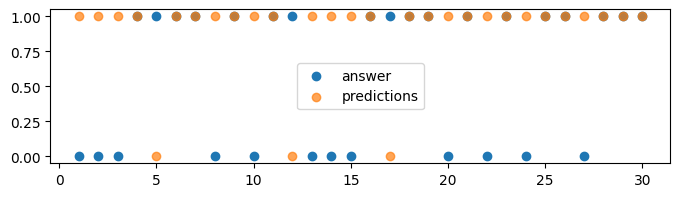

In [67]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xtest.shape[0]+1), yhat, label = 'answer')

plt.scatter(range(1, Xtest.shape[0]+1), y, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

So, if we use a 30 day interval as trend, we can find the next trend with about 74% accuracy on both 1s and 0s, but if we try to do this mid-trends and one by one like our backtesting model; we will see a little bit of setback because the model is not capabale of finding itself's location in the respective trend.

Therefore our backtesting system's accuracy on both 1s and 0s would be about 67%.

As it is shown, our RandomForestClassifier works pretty well and gets a good F1 score based on the situation, but we will try to use more complex models to improve it even more:

In [68]:
Xtrain = train.drop(columns=['Target_XMR'])
ytrain = train['Target_XMR']

In [69]:
Xeval = teste.drop(columns=['Target_XMR'])
yeval = teste['Target_XMR']

In [70]:
Xtest = testf.drop(columns=['Target_XMR'])
ytest = testf['Target_XMR']

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xeval = scaler.transform(Xeval)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=350)

model3.fit(Xtrain, ytrain)
ypred = model3.predict(Xeval)
ypred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1])

<Axes: >

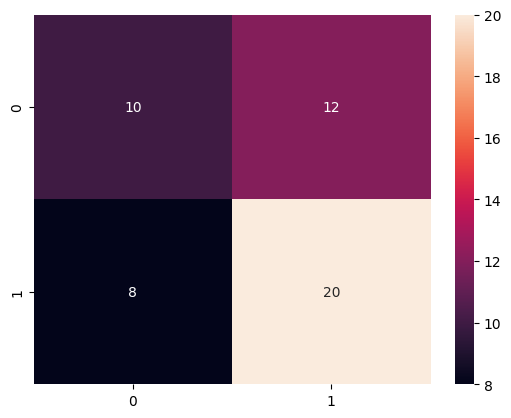

In [73]:
sns.heatmap(confusion_matrix(yeval, ypred), annot=True)

In [74]:
precision_score(yeval, ypred)

0.625

In [75]:
recall_score(yeval, ypred)

0.7142857142857143

In [76]:
accuracy_score(yeval, ypred)

0.6

In [77]:
roc_auc_score(yeval, ypred)

0.5844155844155845

In [78]:
f1_score(yeval, ypred)

0.6666666666666666

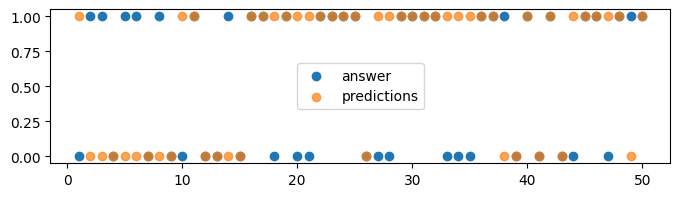

In [79]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xeval.shape[0]+1), yeval, label = 'answer')

plt.scatter(range(1, Xeval.shape[0]+1), ypred, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

Does not seem so good in evaluation, let's try our main data:

In [80]:
ypreds = model3.predict(Xtest)

<Axes: >

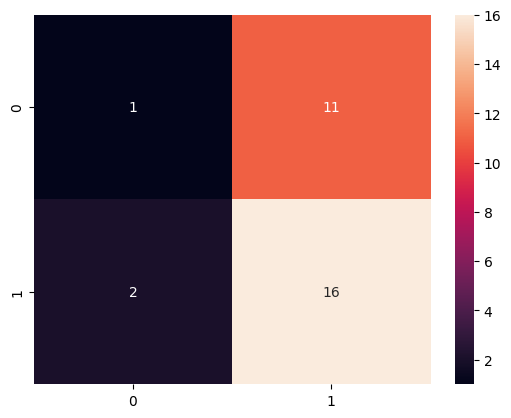

In [81]:
sns.heatmap(confusion_matrix(ytest, ypreds), annot=True)

In [82]:
precision_score(ytest, ypreds)

0.5925925925925926

In [83]:
recall_score(ytest, ypreds)

0.8888888888888888

In [84]:
accuracy_score(ytest, ypreds)

0.5666666666666667

In [85]:
roc_auc_score(ytest, ypreds)

0.4861111111111111

In [86]:
f1_score(ytest, ypreds)

0.711111111111111

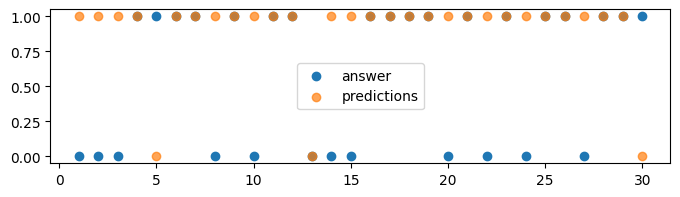

In [87]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xtest.shape[0]+1), ytest, label = 'answer')

plt.scatter(range(1, Xtest.shape[0]+1), ypreds, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

Let's see how does the backtest work:

In [88]:
pf = cf.copy()

In [89]:
pf.drop(columns=['Date'], inplace = True)

In [90]:
def backtest(data, start = 2114, step = 1):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        Xtrain = train.drop(columns=['Target_XMR'])
        ytrains = train['Target_XMR'] 
        Xtest = test.drop(columns=['Target_XMR'])
        scaler = StandardScaler()
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        models = AdaBoostClassifier(n_estimators=350)
        models.fit(Xtrain, ytrains)
        predictions = model3.predict(Xtest)
        all_predictions.append(predictions)
    return all_predictions

In [91]:
preds = backtest(pf)
y = np.array(preds).flatten()

In [92]:
yhat = ytest

In [93]:
confusion_matrix(yhat, y)

array([[ 1, 11],
       [ 3, 15]], dtype=int64)

<Axes: >

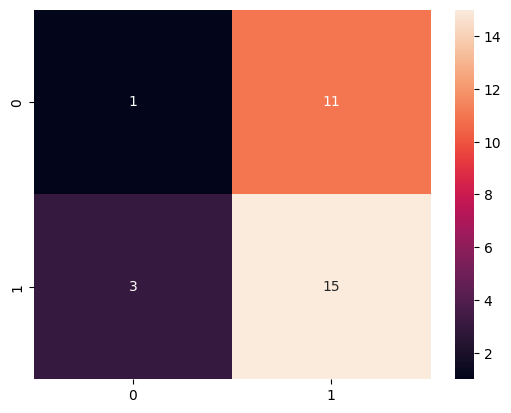

In [94]:
sns.heatmap(confusion_matrix(yhat, y), annot=True)

In [95]:
precision_score(yhat, y)

0.5769230769230769

In [96]:
recall_score(yhat, y)

0.8333333333333334

In [97]:
accuracy_score(yhat, y)

0.5333333333333333

In [98]:
roc_auc_score(yhat, y)

0.45833333333333337

In [99]:
f1_score(yhat, y)

0.6818181818181818

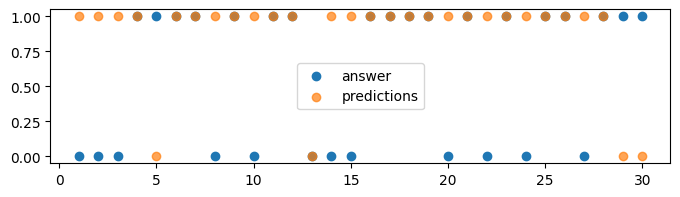

In [100]:
fig , ax = plt.subplots(figsize = (8, 2))

plt.scatter(range(1, Xtest.shape[0]+1), yhat, label = 'answer')

plt.scatter(range(1, Xtest.shape[0]+1), y, label = 'predictions', alpha=0.7)

plt.legend(loc = 'center')
plt.show()

As you can see, AdaBoost is more consistent with Backtesting which is a better measure for our F1 Score because of a better distribution of 1s and 0s.

Finally we can say our RandomForest is better in a full trend finding way with a F1-score of 74% and has a pretty good backtesting F1-score of 67% approximately.

Also our AdaBoost model is slightly better in backtesting with more than 68% in F1-score.